In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.dpi'] = 100

print(" All libraries imported successfully!")
print(" Ready for Advanced Time-Series Analysis & Peak Detection")

 All libraries imported successfully!
 Ready for Advanced Time-Series Analysis & Peak Detection


In [2]:
df = pd.read_csv(
    "cleaned_household_power.csv",
    index_col="DateTime",
    parse_dates=True
)

print(" Data loaded successfully!")
print(f" Total records: {len(df):,}")
print(f" Date range: {df.index.min()} to {df.index.max()}")
print(f" Duration: {(df.index.max() - df.index.min()).days} days")

 Data loaded successfully!
 Total records: 2,049,280
 Date range: 2006-12-16 17:24:00 to 2010-11-26 21:02:00
 Duration: 1441 days


In [3]:
print("First 10 rows:")
print("="*80)
df.head(10)

First 10 rows:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


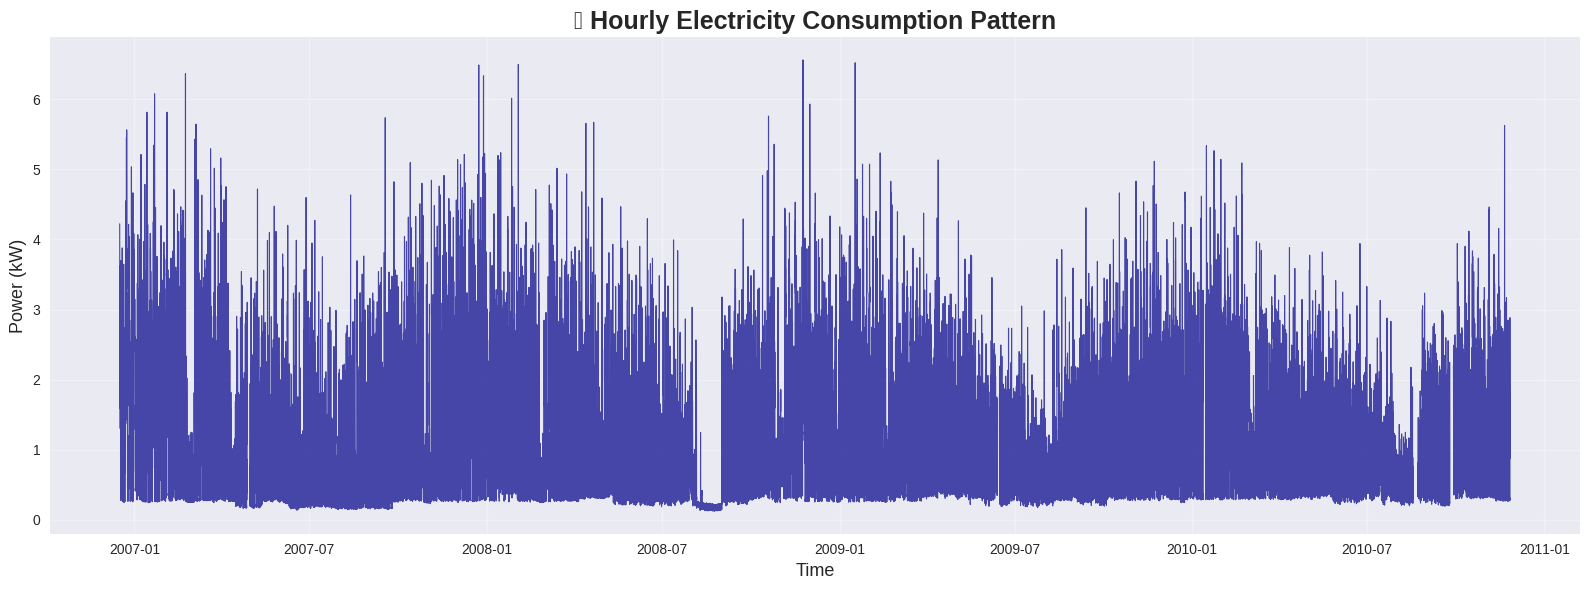

 Graph 1 saved: hourly_consumption_pattern.png
 This shows hour-by-hour electricity usage across the entire period


In [4]:
hourly_usage = df['Global_active_power'].resample('H').mean()

plt.figure(figsize=(16, 6))
plt.plot(hourly_usage, linewidth=0.8, color='darkblue', alpha=0.7)
plt.title('⚡ Hourly Electricity Consumption Pattern', fontsize=18, fontweight='bold')
plt.xlabel('Time', fontsize=13)
plt.ylabel('Power (kW)', fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('hourly_consumption_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 1 saved: hourly_consumption_pattern.png")
print(" This shows hour-by-hour electricity usage across the entire period")

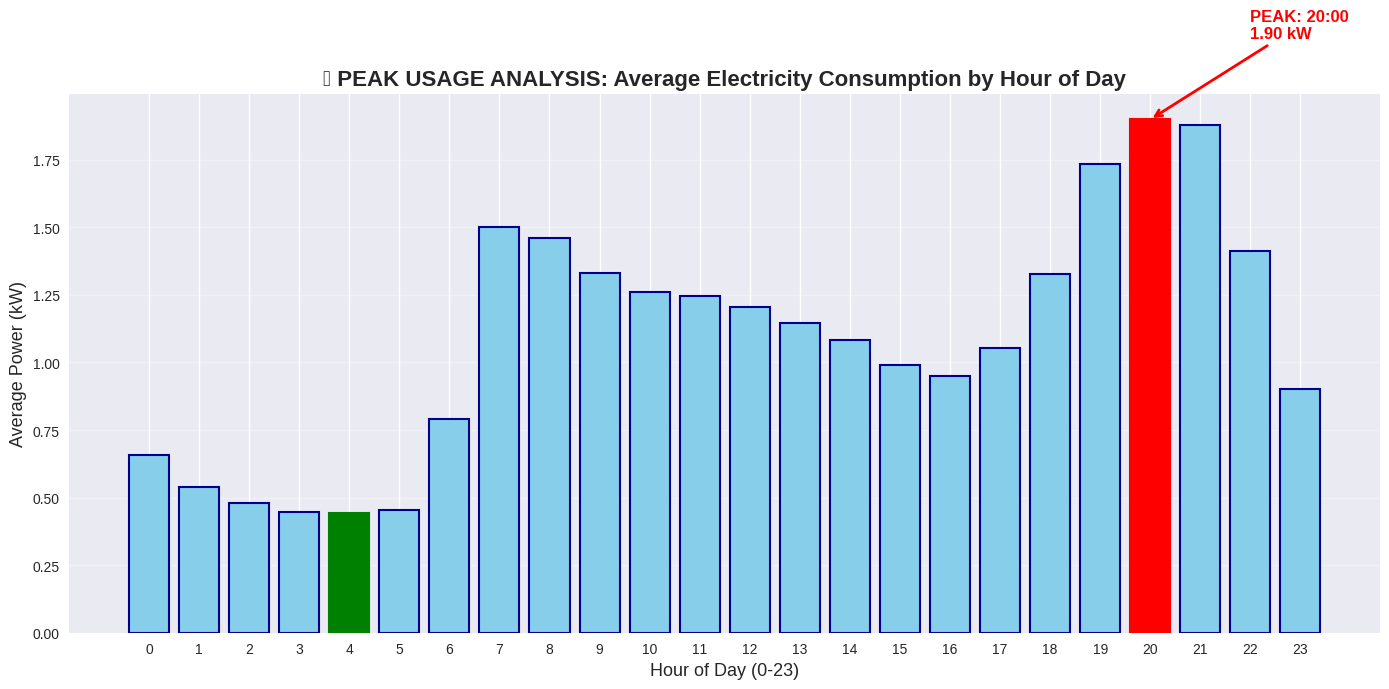

 Graph 2 saved: peak_hours_analysis.png

🔥 PEAK USAGE INSIGHTS:
 PEAK HOUR: 20:00 (Average: 1.899 kW)
 LOWEST HOUR: 4:00 (Average: 0.444 kW)
 Difference: 1.455 kW
 Peak is 327.9% higher than lowest


In [5]:
df['Hour'] = df.index.hour

hourly_avg = df.groupby('Hour')['Global_active_power'].mean()

peak_hour = hourly_avg.idxmax()
peak_value = hourly_avg.max()
lowest_hour = hourly_avg.idxmin()
lowest_value = hourly_avg.min()

plt.figure(figsize=(14, 7))
bars = plt.bar(hourly_avg.index, hourly_avg.values, color='skyblue', edgecolor='darkblue', linewidth=1.5)

bars[peak_hour].set_color('red')
bars[lowest_hour].set_color('green')

plt.title('⚡ PEAK USAGE ANALYSIS: Average Electricity Consumption by Hour of Day',
          fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day (0-23)', fontsize=13)
plt.ylabel('Average Power (kW)', fontsize=13)
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)

plt.annotate(f'PEAK: {peak_hour}:00\n{peak_value:.2f} kW',
             xy=(peak_hour, peak_value),
             xytext=(peak_hour+2, peak_value+0.3),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12, fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('peak_hours_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 2 saved: peak_hours_analysis.png")
print("\n🔥 PEAK USAGE INSIGHTS:")
print("="*80)
print(f" PEAK HOUR: {peak_hour}:00 (Average: {peak_value:.3f} kW)")
print(f" LOWEST HOUR: {lowest_hour}:00 (Average: {lowest_value:.3f} kW)")
print(f" Difference: {peak_value - lowest_value:.3f} kW")
print(f" Peak is {((peak_value/lowest_value - 1) * 100):.1f}% higher than lowest")

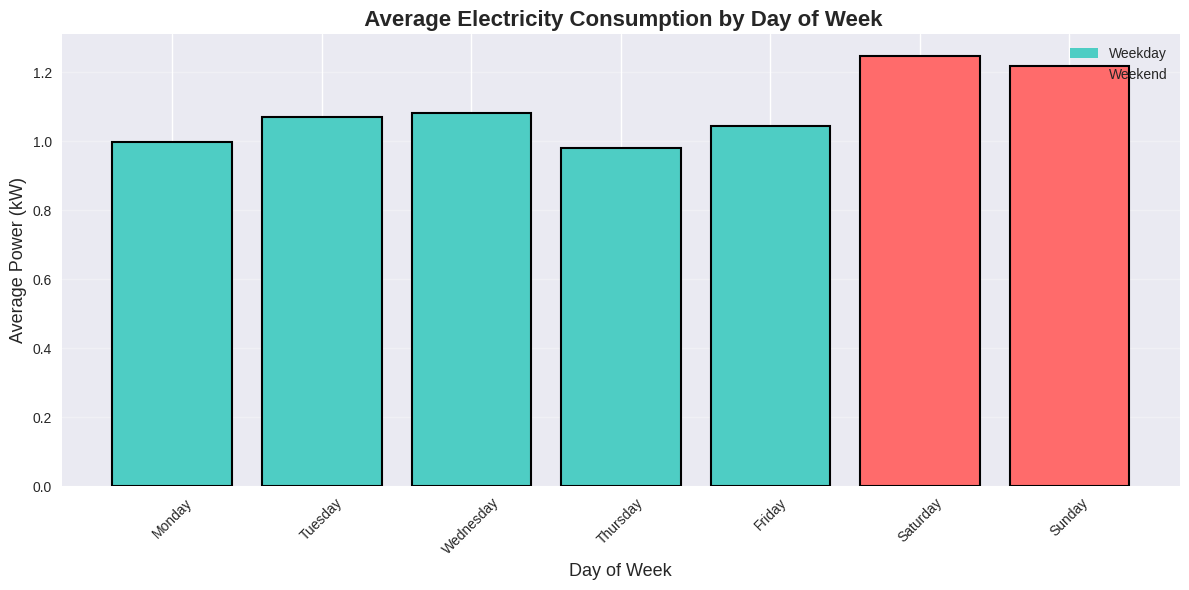

 Graph 3 saved: day_of_week_analysis.png

 DAY OF WEEK INSIGHTS:
Monday      : 1.000 kW
Tuesday     : 1.070 kW
Wednesday   : 1.083 kW
Thursday    : 0.982 kW
Friday      : 1.043 kW
Saturday    : 1.248 kW
Sunday      : 1.220 kW


In [6]:

df['DayOfWeek'] = df.index.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = df.groupby('DayOfWeek')['Global_active_power'].mean().reindex(day_order)

plt.figure(figsize=(12, 6))
colors = ['#FF6B6B' if day in ['Saturday', 'Sunday'] else '#4ECDC4' for day in day_order]
bars = plt.bar(day_order, daily_avg.values, color=colors, edgecolor='black', linewidth=1.5)

plt.title(' Average Electricity Consumption by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=13)
plt.ylabel('Average Power (kW)', fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#4ECDC4', label='Weekday'),
                   Patch(facecolor='#FF6B6B', label='Weekend')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('day_of_week_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 3 saved: day_of_week_analysis.png")
print("\n DAY OF WEEK INSIGHTS:")
print("="*80)
for day in day_order:
    print(f"{day:12s}: {daily_avg[day]:.3f} kW")

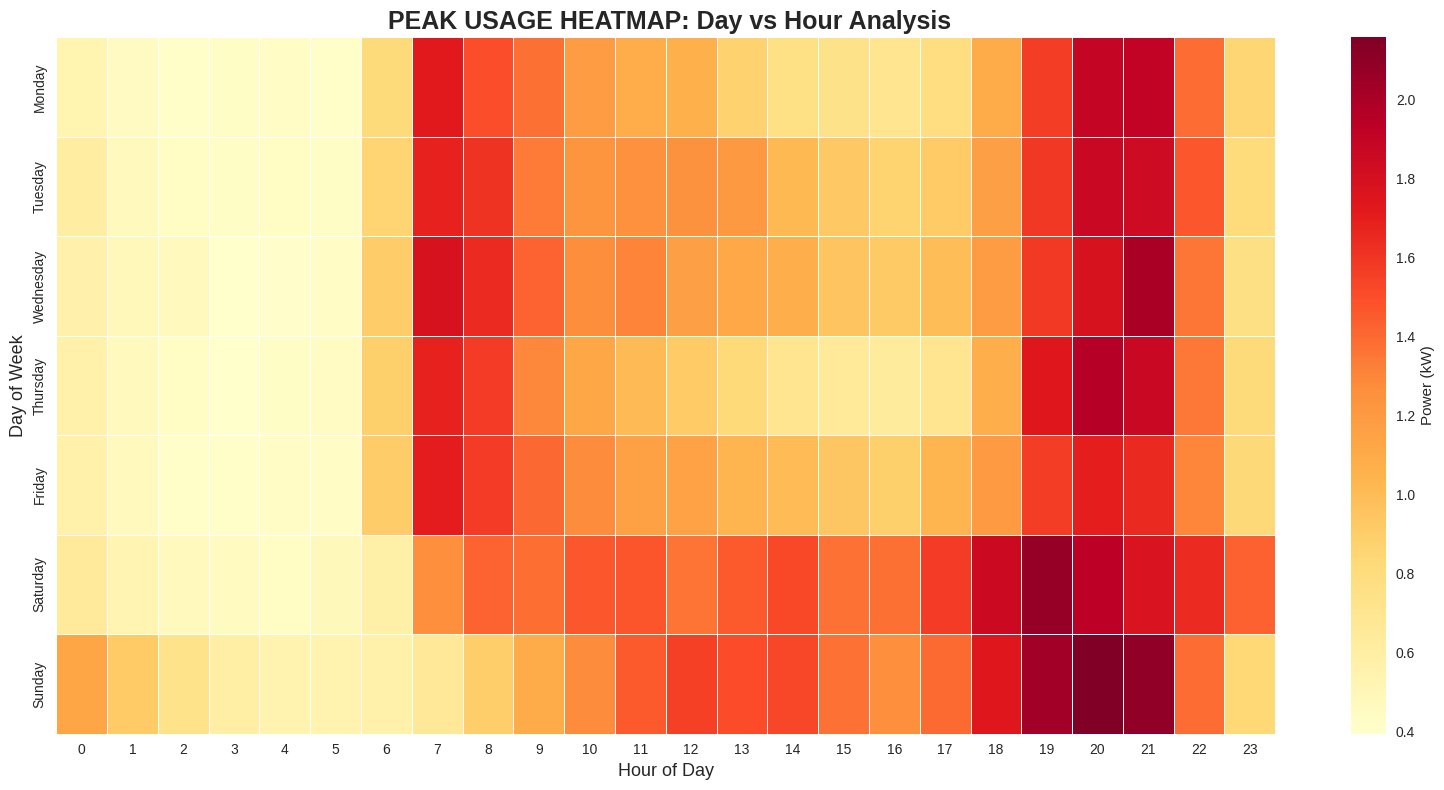

 Graph 4 saved: peak_heatmap_day_hour.png
 THIS IS YOUR KEY GRAPH! It shows exactly when peak usage occurs
   - Red areas = HIGH consumption
   - Yellow areas = MEDIUM consumption
   - Light areas = LOW consumption


In [7]:
pivot_table = df.pivot_table(
    values='Global_active_power',
    index='DayOfWeek',
    columns='Hour',
    aggfunc='mean'
)

pivot_table = pivot_table.reindex(day_order)

plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, fmt='.2f',
            cbar_kws={'label': 'Power (kW)'}, linewidths=0.5)
plt.title(' PEAK USAGE HEATMAP: Day vs Hour Analysis', fontsize=18, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=13)
plt.ylabel('Day of Week', fontsize=13)
plt.tight_layout()
plt.savefig('peak_heatmap_day_hour.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 4 saved: peak_heatmap_day_hour.png")
print(" THIS IS YOUR KEY GRAPH! It shows exactly when peak usage occurs")
print("   - Red areas = HIGH consumption")
print("   - Yellow areas = MEDIUM consumption")
print("   - Light areas = LOW consumption")

 TOP 10 PEAK CONSUMPTION HOURS:
                     Global_active_power  Hour DayOfWeek
DateTime                                                
2009-02-22 17:09:00               11.122    17    Sunday
2007-03-04 19:34:00               10.670    19    Sunday
2007-03-04 19:33:00               10.650    19    Sunday
2009-02-22 17:08:00               10.536    17    Sunday
2008-11-30 20:19:00               10.348    20    Sunday
2008-10-19 01:24:00               10.290     1    Sunday
2008-01-27 19:24:00               10.162    19    Sunday
2007-03-04 19:32:00               10.154    19    Sunday
2008-11-30 20:17:00               10.074    20    Sunday
2008-10-19 01:25:00               10.064     1    Sunday


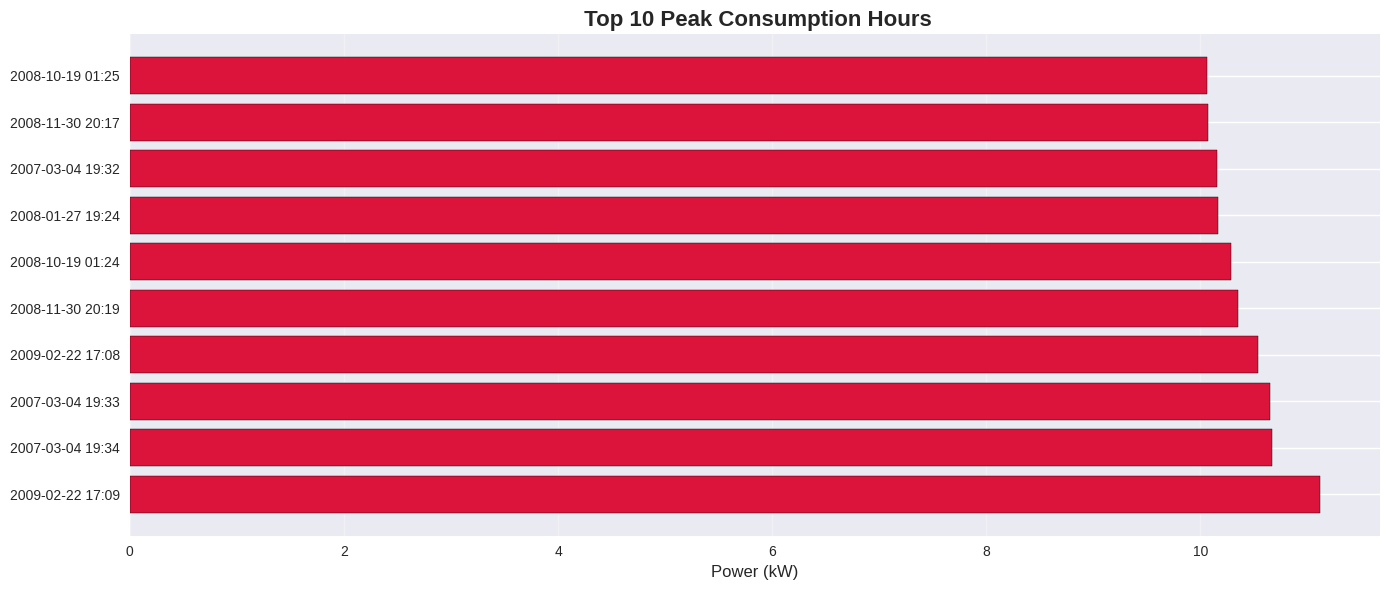

 Graph 5 saved: top_10_peaks.png


In [8]:
top_peaks = df.nlargest(10, 'Global_active_power')[['Global_active_power', 'Hour', 'DayOfWeek']]

print(" TOP 10 PEAK CONSUMPTION HOURS:")
print("="*80)
print(top_peaks.to_string())

plt.figure(figsize=(14, 6))
peak_dates = top_peaks.index.strftime('%Y-%m-%d %H:%M')
plt.barh(range(10), top_peaks['Global_active_power'].values, color='crimson', edgecolor='black')
plt.yticks(range(10), peak_dates)
plt.xlabel('Power (kW)', fontsize=12)
plt.title(' Top 10 Peak Consumption Hours', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('top_10_peaks.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 5 saved: top_10_peaks.png")

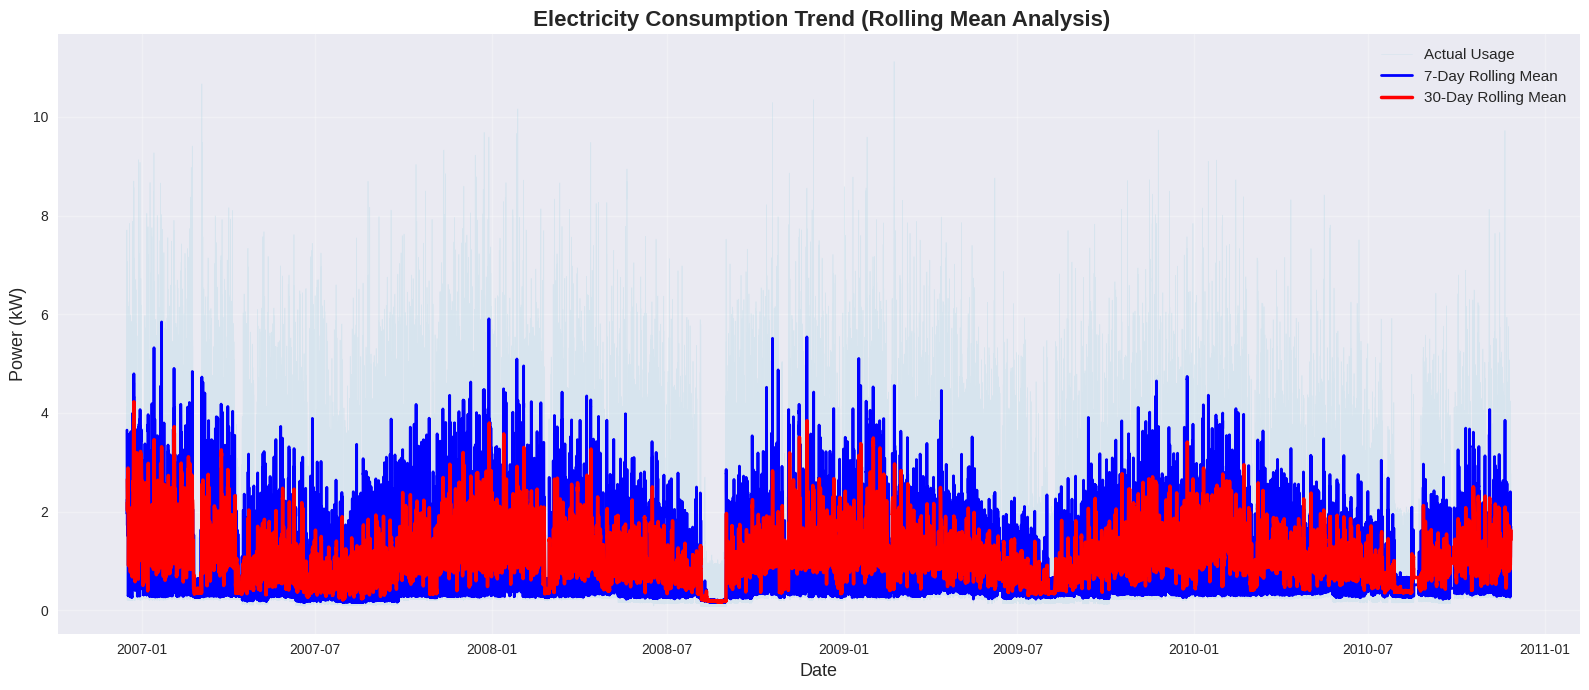

 Graph 6 saved: rolling_mean_trend.png
 Rolling means smooth out daily fluctuations to reveal long-term trends


In [9]:
df['Rolling_7_Days'] = df['Global_active_power'].rolling(window=168).mean()  # 7 days (168 hours)
df['Rolling_30_Days'] = df['Global_active_power'].rolling(window=720).mean()  # 30 days

plt.figure(figsize=(16, 7))
plt.plot(df.index, df['Global_active_power'], alpha=0.3, linewidth=0.5,
         label='Actual Usage', color='lightblue')
plt.plot(df.index, df['Rolling_7_Days'], linewidth=2,
         label='7-Day Rolling Mean', color='blue')
plt.plot(df.index, df['Rolling_30_Days'], linewidth=2.5,
         label='30-Day Rolling Mean', color='red')

plt.title(' Electricity Consumption Trend (Rolling Mean Analysis)',
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Power (kW)', fontsize=13)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('rolling_mean_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 6 saved: rolling_mean_trend.png")
print(" Rolling means smooth out daily fluctuations to reveal long-term trends")

 ANOMALY DETECTION:
 Mean power consumption: 1.092 kW
 Standard deviation: 1.057 kW
 Threshold (Mean + 2*Std): 3.206 kW
 Anomalies detected: 106,882 (5.22%)


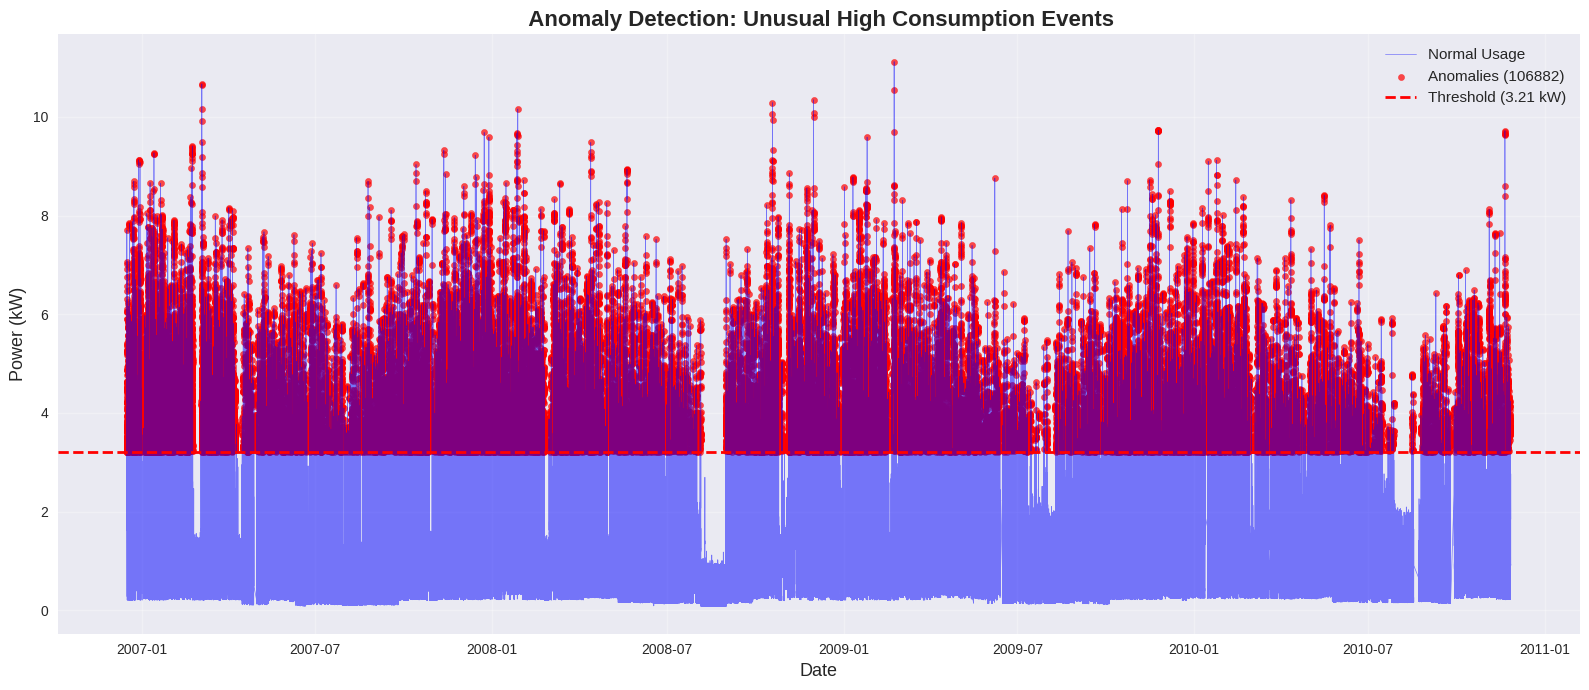

 Graph 7 saved: anomaly_detection.png


In [10]:
mean_power = df['Global_active_power'].mean()
std_power = df['Global_active_power'].std()
threshold = mean_power + 2 * std_power

df['Anomaly'] = df['Global_active_power'] > threshold
anomaly_count = df['Anomaly'].sum()

print(" ANOMALY DETECTION:")
print("="*80)
print(f" Mean power consumption: {mean_power:.3f} kW")
print(f" Standard deviation: {std_power:.3f} kW")
print(f" Threshold (Mean + 2*Std): {threshold:.3f} kW")
print(f" Anomalies detected: {anomaly_count:,} ({(anomaly_count/len(df)*100):.2f}%)")

plt.figure(figsize=(16, 7))
plt.plot(df.index, df['Global_active_power'], linewidth=0.5,
         color='blue', alpha=0.5, label='Normal Usage')
anomalies = df[df['Anomaly']]
plt.scatter(anomalies.index, anomalies['Global_active_power'],
           color='red', s=20, alpha=0.7, label=f'Anomalies ({anomaly_count})')
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2,
           label=f'Threshold ({threshold:.2f} kW)')

plt.title(' Anomaly Detection: Unusual High Consumption Events',
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Power (kW)', fontsize=13)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('anomaly_detection.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 7 saved: anomaly_detection.png")

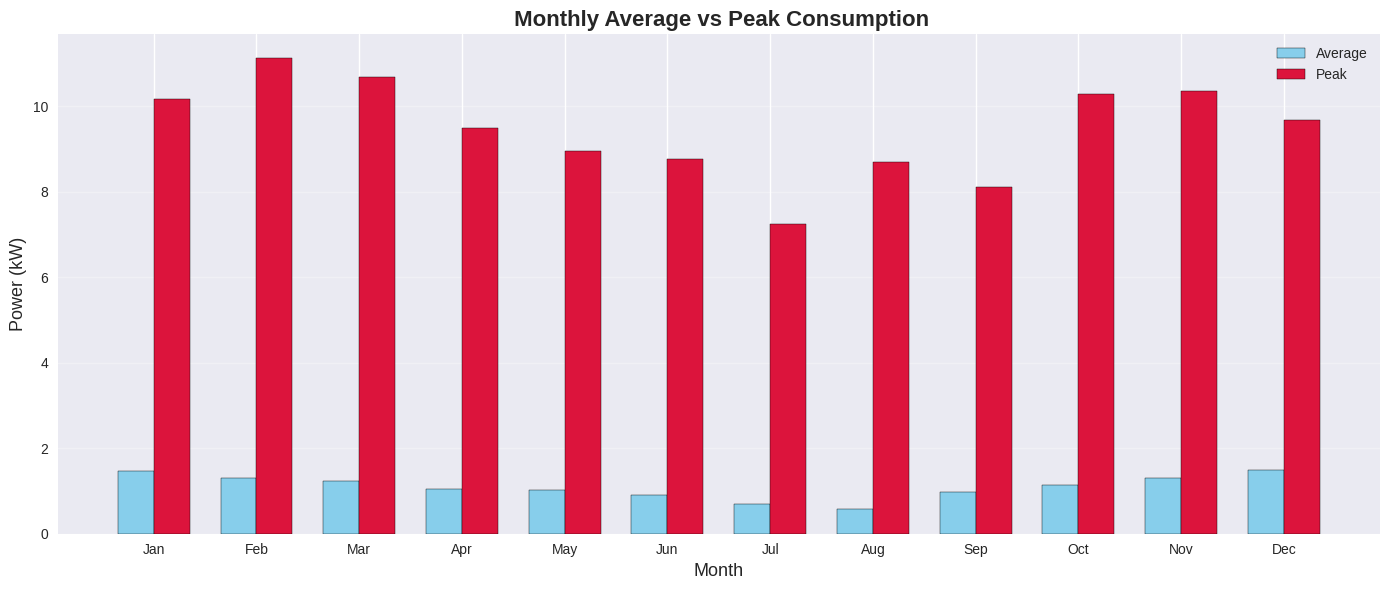

 Graph 8 saved: monthly_peak_analysis.png


In [11]:
df['Month'] = df.index.month
monthly_peak = df.groupby('Month')['Global_active_power'].max()
monthly_avg = df.groupby('Month')['Global_active_power'].mean()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(14, 6))
x = np.arange(len(monthly_peak))
width = 0.35

bars1 = plt.bar(x - width/2, monthly_avg.values, width, label='Average',
                color='skyblue', edgecolor='black')
bars2 = plt.bar(x + width/2, monthly_peak.values, width, label='Peak',
                color='crimson', edgecolor='black')

plt.xlabel('Month', fontsize=13)
plt.ylabel('Power (kW)', fontsize=13)
plt.title(' Monthly Average vs Peak Consumption', fontsize=16, fontweight='bold')
plt.xticks(x, month_names)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('monthly_peak_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 8 saved: monthly_peak_analysis.png")

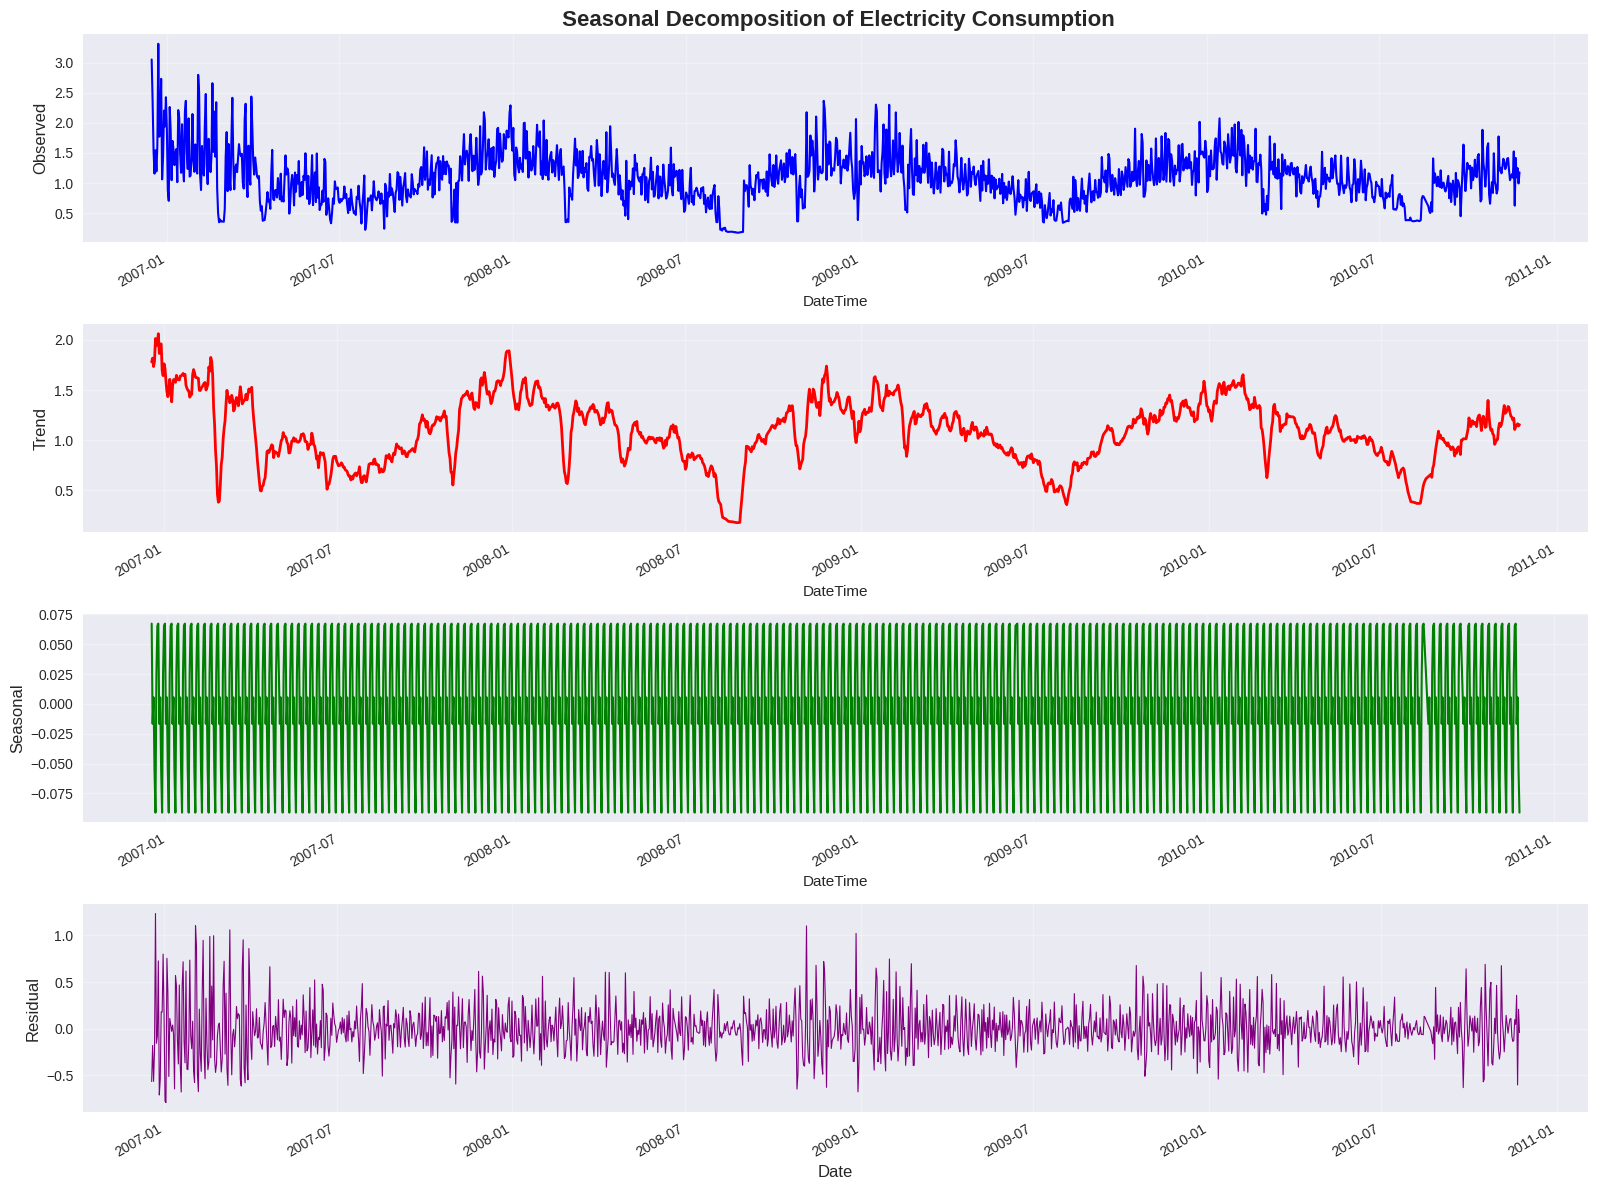

 Graph 9 saved: seasonal_decomposition.png
 This breaks down the time series into:
   - Observed: Original data
   - Trend: Long-term pattern
   - Seasonal: Repeating weekly pattern
   - Residual: Random noise/irregularities


In [14]:
daily_data = df['Global_active_power'].resample('D').mean()

daily_data = daily_data.dropna()

if len(daily_data) < 14:
    print(" Not enough data for seasonal decomposition")
    print(" Skipping this analysis...")
else:
    try:
        decomposition = seasonal_decompose(daily_data, model='additive', period=7)

        fig, axes = plt.subplots(4, 1, figsize=(16, 12))

        decomposition.observed.plot(ax=axes[0], color='blue', linewidth=1.5)
        axes[0].set_ylabel('Observed', fontsize=12)
        axes[0].set_title(' Seasonal Decomposition of Electricity Consumption',
                          fontsize=16, fontweight='bold')
        axes[0].grid(True, alpha=0.3)

        decomposition.trend.plot(ax=axes[1], color='red', linewidth=2)
        axes[1].set_ylabel('Trend', fontsize=12)
        axes[1].grid(True, alpha=0.3)

        decomposition.seasonal.plot(ax=axes[2], color='green', linewidth=1.5)
        axes[2].set_ylabel('Seasonal', fontsize=12)
        axes[2].grid(True, alpha=0.3)

        decomposition.resid.plot(ax=axes[3], color='purple', linewidth=0.8)
        axes[3].set_ylabel('Residual', fontsize=12)
        axes[3].set_xlabel('Date', fontsize=12)
        axes[3].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('seasonal_decomposition.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(" Graph 9 saved: seasonal_decomposition.png")
        print(" This breaks down the time series into:")
        print("   - Observed: Original data")
        print("   - Trend: Long-term pattern")
        print("   - Seasonal: Repeating weekly pattern")
        print("   - Residual: Random noise/irregularities")

    except Exception as e:
        print(f" Error in seasonal decomposition: {e}")
        print(" Creating alternative trend visualization instead...")

        plt.figure(figsize=(16, 6))
        plt.plot(daily_data.index, daily_data.values, linewidth=1.5,
                color='blue', alpha=0.7, label='Daily Average')

        rolling_7 = daily_data.rolling(window=7, center=True).mean()
        plt.plot(rolling_7.index, rolling_7.values, linewidth=2.5,
                color='red', label='7-Day Trend')

        plt.title(' Daily Electricity Consumption with Trend',
                  fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=13)
        plt.ylabel('Power (kW)', fontsize=13)
        plt.legend(loc='best', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('seasonal_decomposition.png', dpi=300, bbox_inches='tight')
        plt.show()

        print(" Alternative graph saved: seasonal_decomposition.png")

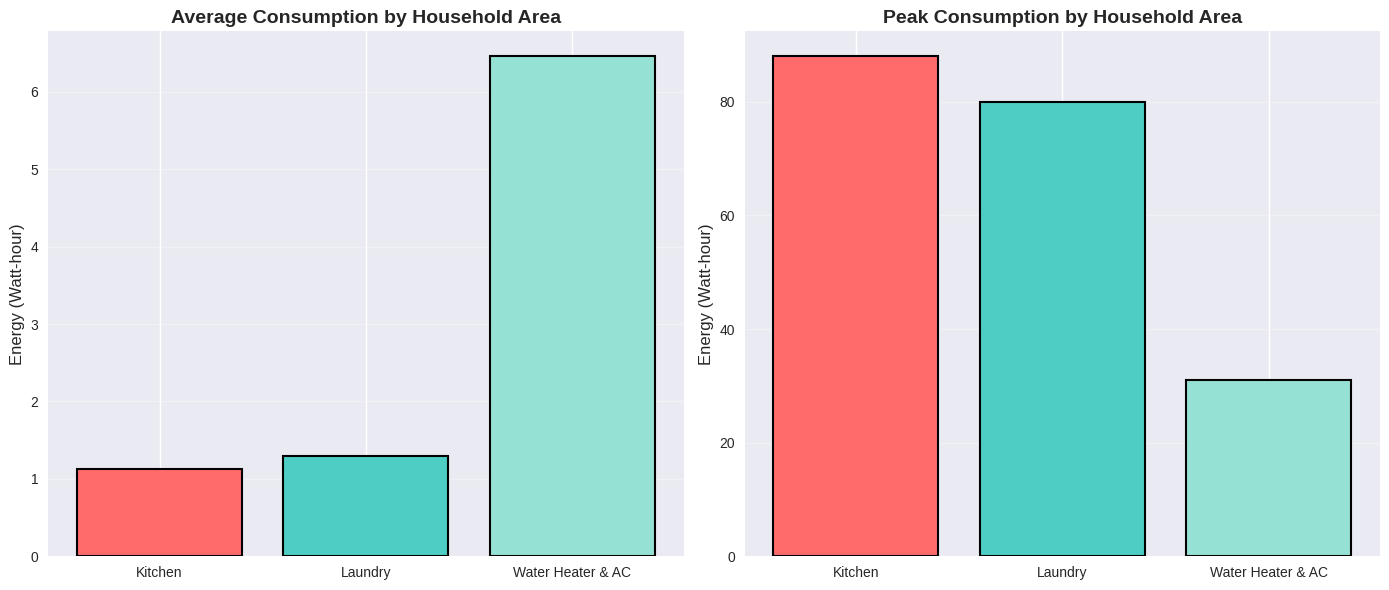

 Graph 10 saved: submetering_peak_analysis.png

 HOUSEHOLD AREA ANALYSIS:
Kitchen              - Average: 1.12 Wh | Peak: 88.00 Wh
Laundry              - Average: 1.30 Wh | Peak: 80.00 Wh
Water Heater & AC    - Average: 6.46 Wh | Peak: 31.00 Wh


In [15]:
sub_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
sub_peaks = df[sub_cols].max()
sub_means = df[sub_cols].mean()

area_names = ['Kitchen', 'Laundry', 'Water Heater & AC']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(area_names, sub_means.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'],
            edgecolor='black', linewidth=1.5)
axes[0].set_title('Average Consumption by Household Area', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Energy (Watt-hour)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(area_names, sub_peaks.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'],
            edgecolor='black', linewidth=1.5)
axes[1].set_title('Peak Consumption by Household Area', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Energy (Watt-hour)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('submetering_peak_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Graph 10 saved: submetering_peak_analysis.png")
print("\n HOUSEHOLD AREA ANALYSIS:")
print("="*80)
for i, area in enumerate(area_names):
    print(f"{area:20s} - Average: {sub_means.values[i]:.2f} Wh | Peak: {sub_peaks.values[i]:.2f} Wh")

In [16]:
print("="*80)
print(" COMPREHENSIVE PEAK USAGE ANALYSIS REPORT")
print("="*80)

print("\n PEAK HOURS ANALYSIS:")
print("-"*80)
print(f"Peak Hour: {peak_hour}:00 with average consumption of {peak_value:.3f} kW")
print(f"Lowest Hour: {lowest_hour}:00 with average consumption of {lowest_value:.3f} kW")

print("\n PEAK DAYS:")
print("-"*80)
peak_day = daily_avg.idxmax()
peak_day_value = daily_avg.max()
print(f"Peak Day: {peak_day} with average consumption of {peak_day_value:.3f} kW")

print("\n PEAK MONTHS:")
print("-"*80)
peak_month_idx = monthly_avg.idxmax()
peak_month_value = monthly_avg.max()
month_name = month_names[peak_month_idx - 1]
print(f"Peak Month: {month_name} (Month {peak_month_idx}) with average {peak_month_value:.3f} kW")

print("\n ANOMALIES:")
print("-"*80)
print(f"Total anomalies detected: {anomaly_count:,} ({(anomaly_count/len(df)*100):.2f}%)")
print(f"Maximum consumption ever: {df['Global_active_power'].max():.3f} kW")
print(f"This occurred on: {df['Global_active_power'].idxmax()}")

print("\n HOUSEHOLD AREA WITH HIGHEST CONSUMPTION:")
print("-"*80)
max_sub_idx = sub_means.idxmax()
max_sub_area = area_names[sub_cols.index(max_sub_idx)]
print(f"Area: {max_sub_area} ({max_sub_idx})")
print(f"Average: {sub_means[max_sub_idx]:.2f} Wh")
print(f"Peak: {sub_peaks[max_sub_idx]:.2f} Wh")

print("\n" + "="*80)
print(" ADVANCED ANALYSIS COMPLETED!")
print("="*80)

 COMPREHENSIVE PEAK USAGE ANALYSIS REPORT

 PEAK HOURS ANALYSIS:
--------------------------------------------------------------------------------
Peak Hour: 20:00 with average consumption of 1.899 kW
Lowest Hour: 4:00 with average consumption of 0.444 kW

 PEAK DAYS:
--------------------------------------------------------------------------------
Peak Day: Saturday with average consumption of 1.248 kW

 PEAK MONTHS:
--------------------------------------------------------------------------------
Peak Month: Dec (Month 12) with average 1.490 kW

 ANOMALIES:
--------------------------------------------------------------------------------
Total anomalies detected: 106,882 (5.22%)
Maximum consumption ever: 11.122 kW
This occurred on: 2009-02-22 17:09:00

 HOUSEHOLD AREA WITH HIGHEST CONSUMPTION:
--------------------------------------------------------------------------------
Area: Water Heater & AC (Sub_metering_3)
Average: 6.46 Wh
Peak: 31.00 Wh

 ADVANCED ANALYSIS COMPLETED!


In [17]:
summary = {
    'Peak Hour': f"{peak_hour}:00",
    'Peak Hour Value': f"{peak_value:.3f} kW",
    'Lowest Hour': f"{lowest_hour}:00",
    'Peak Day': peak_day,
    'Peak Month': month_name,
    'Total Anomalies': anomaly_count,
    'Max Consumption Ever': f"{df['Global_active_power'].max():.3f} kW",
    'Peak Household Area': max_sub_area
}

summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
summary_df.to_csv('peak_analysis_summary.csv', index=False)

print(" Summary saved: peak_analysis_summary.csv")
print("\n PEAK ANALYSIS SUMMARY:")
print("="*80)
print(summary_df.to_string(index=False))

 Summary saved: peak_analysis_summary.csv

 PEAK ANALYSIS SUMMARY:
              Metric             Value
           Peak Hour             20:00
     Peak Hour Value          1.899 kW
         Lowest Hour              4:00
            Peak Day          Saturday
          Peak Month               Dec
     Total Anomalies            106882
Max Consumption Ever         11.122 kW
 Peak Household Area Water Heater & AC


In [18]:
from google.colab import files
import os

print(" Downloading all graphs...")
print("="*80)

graphs = [
    'hourly_consumption_pattern.png',
    'peak_hours_analysis.png',
    'day_of_week_analysis.png',
    'peak_heatmap_day_hour.png',
    'top_10_peaks.png',
    'rolling_mean_trend.png',
    'anomaly_detection.png',
    'monthly_peak_analysis.png',
    'seasonal_decomposition.png',
    'submetering_peak_analysis.png',
    'peak_analysis_summary.csv'
]

for graph in graphs:
    if os.path.exists(graph):
        files.download(graph)
        print(f" Downloaded: {graph}")

print("\n All files downloaded successfully!")
print("\n Total visualizations created: 10 graphs + 1 summary CSV")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: hourly_consumption_pattern.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: peak_hours_analysis.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: day_of_week_analysis.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: peak_heatmap_day_hour.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: top_10_peaks.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: rolling_mean_trend.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: anomaly_detection.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: monthly_peak_analysis.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: seasonal_decomposition.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: submetering_peak_analysis.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Downloaded: peak_analysis_summary.csv

 All files downloaded successfully!

 Total visualizations created: 10 graphs + 1 summary CSV
